# Clustering
Involves identifying groups when you don't know the labels beforehand.

## k-means clustering
We tell the algorithm how many clusters to make. For example, we may give it 1000 people and ask it to create 5 groups.

## hierarchical clustering
We don't specify how many clusters to make: algorithm start with each instance in its own cluster and with each iteration combines the two most similar clusters into one repeatedly until there is only one cluster. To determine the closest clusters to join, we use a distance formula:
- Single-linkage clustering
    - Distance between two clusters is the shortest distance between any member of one cluster to any member of the other.
- Complete-linkage clustering
    - Distance between two clusters is the greatest distance between any member of one cluster to any member of the other
- Average-linkage clustering
    - Distance between two clusters is the average distance between any member of one cluster to any member of the other
    
## Hierarchical Clustering Dog Breeds By Height (inches) and Weight (pounds)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


dogs = {'breed': ['Border Collie', 'Boston Terrier', 'Brittany Spaniel', 'Bullmastiff', 'Chihuahua', 'German Shepherd', 'Golden Retriever', 'Great Dane', 'Portuguese Water Dog', 'Standard Poodle', 'Yorkshire Terrier'],
        'height': [20, 16, 18, 27, 8, 25, 23, 32, 21, 19, 6],
        'weight': [45, 20, 35, 120, 8, 78, 70, 160, 50, 65, 7]}

df = pd.DataFrame(dogs)
df

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


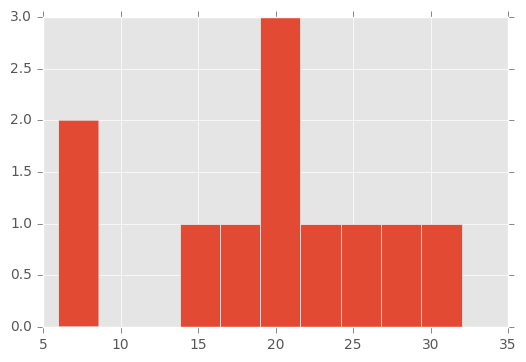

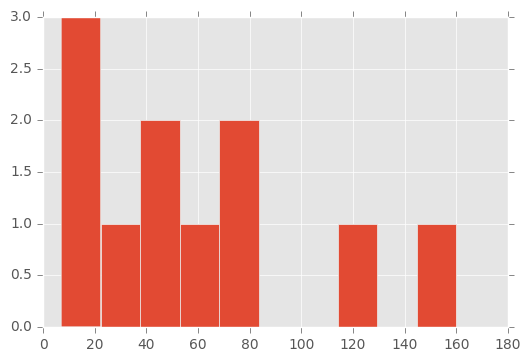

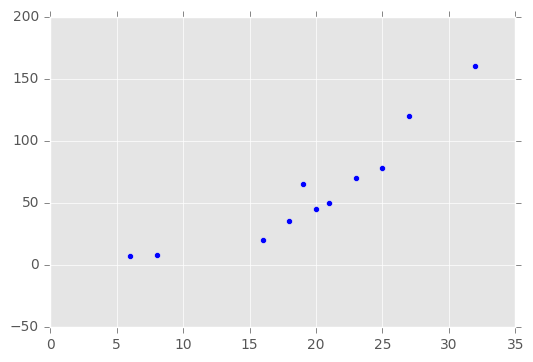

In [2]:
plt.figure()
plt.hist(df['height'])
plt.show()

plt.figure()
plt.hist(df['weight'])
plt.show()

plt.figure()
plt.scatter(df['height'], df['weight'])
plt.show()

## Normalisation
Modify the numbers to modified standard scores: each value - median / absolute standard deviation

$$
abs = \frac{1}{card(x)}\sum_i|x_i - \mu|
$$

### Modified Standard Scores:

In [3]:
dogs = {'breed': ['Border Collie', 'Boston Terrier', 'Brittany Spaniel', 'Bullmastiff', 'Chihuahua', 'German Shepherd', 'Golden Retriever', 'Great Dane', 'Portuguese Water Dog', 'Standard Poodle', 'Yorkshire Terrier'],
        'height': [0, -0.7213, -0.3607, 1.2623, -2.1639, 0.9016, 0.541, 2.16393, 0.1803, -0.1803, -2.525],
        'weight': [-0.1455, -0.873, -0.4365, 2.03704, -1.2222, 0.81481, 0.58201, 3.20106, 0, 0.43651, -1.25132]}

df = pd.DataFrame(dogs)
df

,breed,height,weight
0,Border Collie,0.00000,-0.14550
1,Boston Terrier,-0.72130,-0.87300
2,Brittany Spaniel,-0.36070,-0.43650
3,Bullmastiff,1.26230,2.03704
4,Chihuahua,-2.16390,-1.22220
5,German Shepherd,0.90160,0.81481
6,Golden Retriever,0.54100,0.58201
7,Great Dane,2.16393,3.20106
8,Portuguese Water Dog,0.18030,0.00000
9,Standard Poodle,-0.18030,0.43651


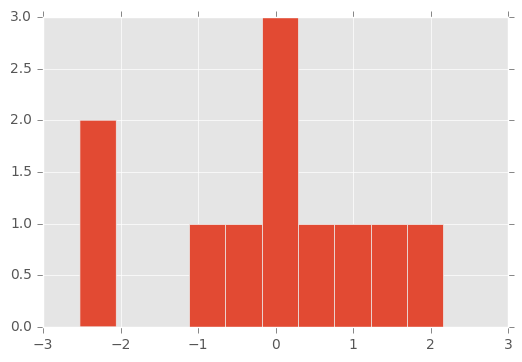

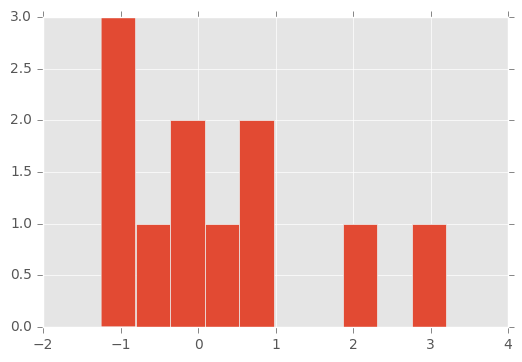

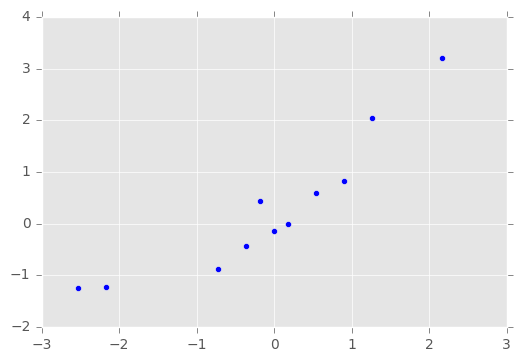

In [4]:
plt.figure()
plt.hist(df['height'])
plt.show()

plt.figure()
plt.hist(df['weight'])
plt.show()

plt.figure()
plt.scatter(df['height'], df['weight'])
plt.show()

## Euclidean Distance
Calculate the Euclidean distance between all the breeds:
![](../resources/breed_distances.png)

## Hierarchical Clustering Algorithm
1. Every breed is in it's own cluster, you find the two closest clusters and merge them
2. Find the next 2 closest clusters and combine them
3. Repeat process again
4. Continue clustering, may now start to cluster some of the groups into larger clusters

![](../resources/breed_clusters.png)

## Clustering program can use a priority queue
- In a regular queue, the order you put the items in the queue is the order you take them out again
- Each item in a priority queue has an associated priority which determines the order they're retreived in
- When bulding a hierarchical clusterer, we put the clusters in a priority queue: priority will be the shortest distance to a cluster's nearest neighbour
- 

In [5]:
from queue import PriorityQueue
singersQueue = PriorityQueue()

singersQueue.put((16, 'Jack'))
singersQueue.put((15, 'Rina'))
singersQueue.put((14, 'Tom'))
singersQueue.put((17, 'Keaton'))

print(singersQueue.get())
print(singersQueue.get())

(14, 'Tom')
(15, 'Rina')


In [6]:
singersQueue